In [3]:
# Imports
import gzip, json # as some instance files may have been compressed

# Re-import dependencies (in case earlier import was skipped)
import numpy    as np
import numpy.ma as ma
from math       import ceil, log2
from matplotlib import pyplot as plt


from run_experiment import to_masked, plot_boxplots, plot_best, extract_data

In [2]:
data_file = "data/crossover-indices_gen.json"
# data_file = "data/pop_size_2-12.json"
# data_file = "data/linkage_based_crossover.json"
# data_file = "data/region_based_crossover.json"

with open(data_file, "rt") as f:
    setup_names, all_fitnesses_overtime, all_iterations, all_total_times, all_iter_times = json.load(f)


setup_idxs          = {setup_name: i for i, setup_name in enumerate(setup_names)}

all_fitnesses       = to_masked(all_fitnesses_overtime)
# Average from the different runs
all_fitnesses_avg   = np.ma.mean(all_fitnesses, axis=1)

optimal_sol=5426670

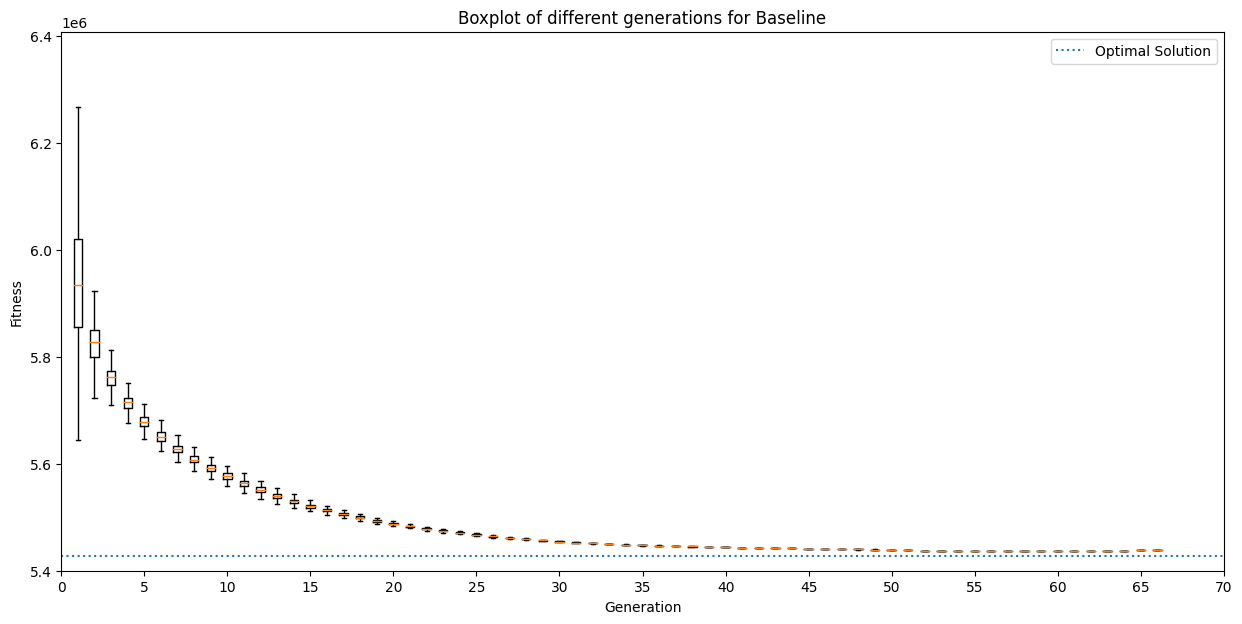

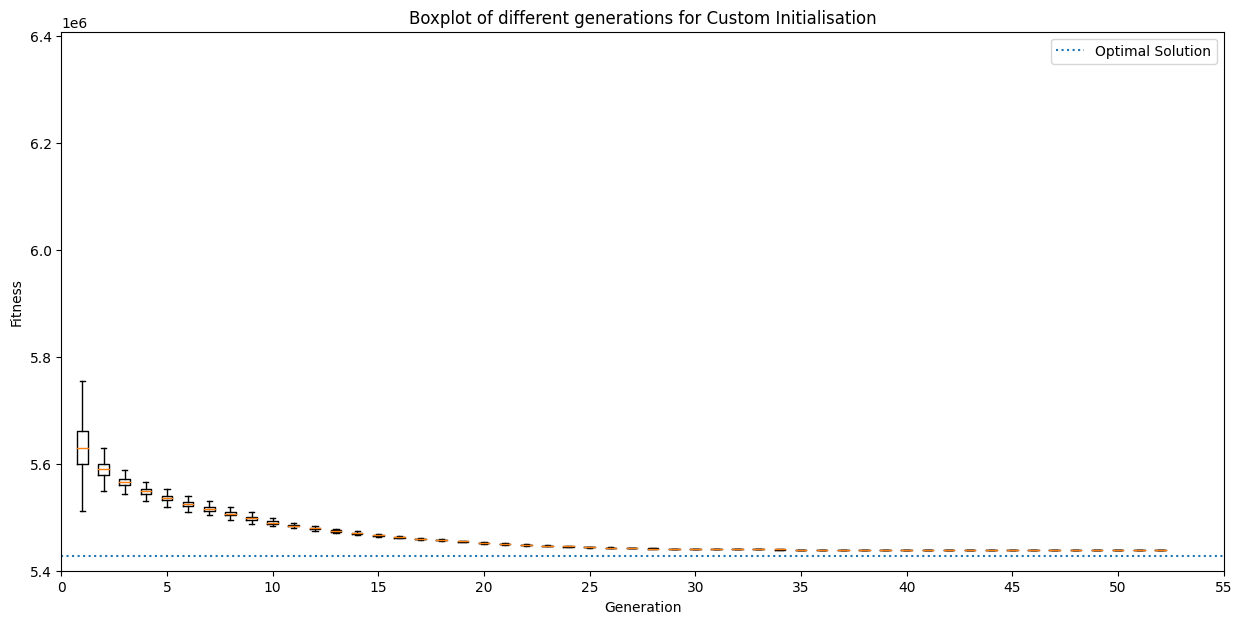

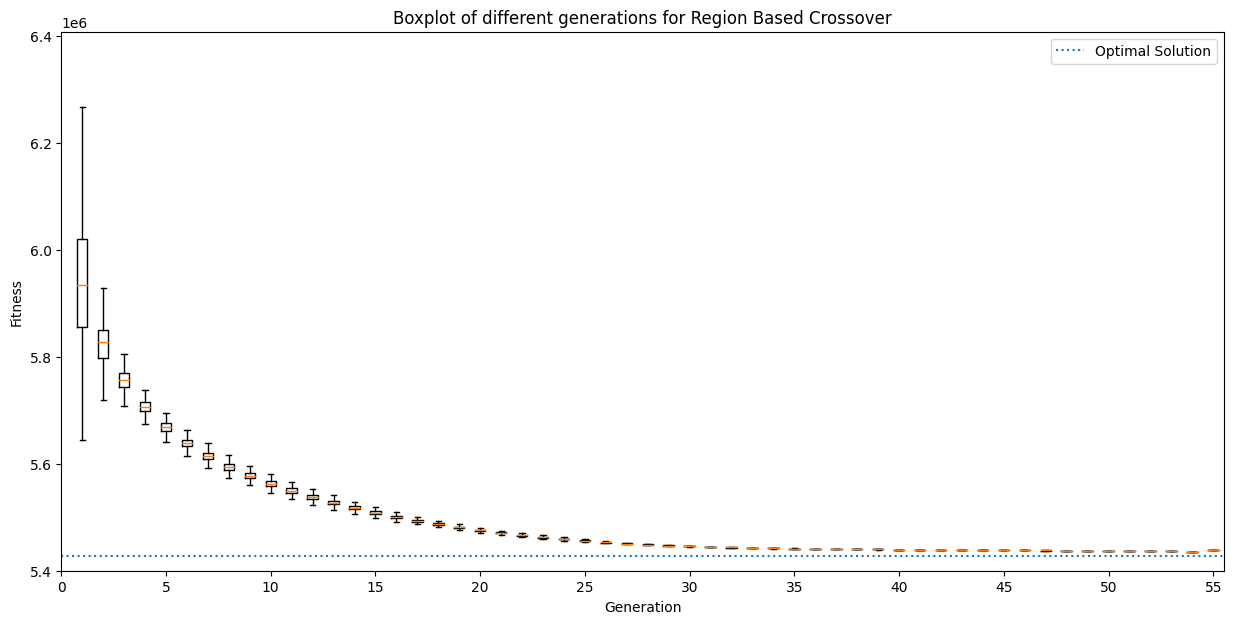

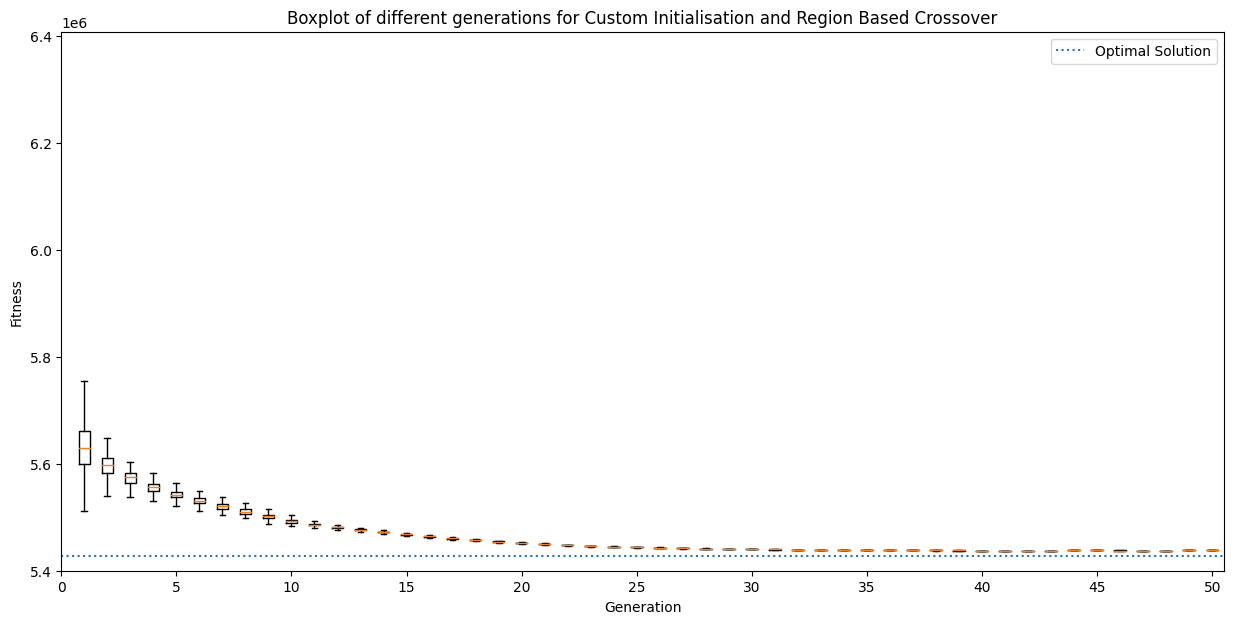

In [12]:
plot_boxplots(all_fitnesses_avg, setup_names, optimal_sol)

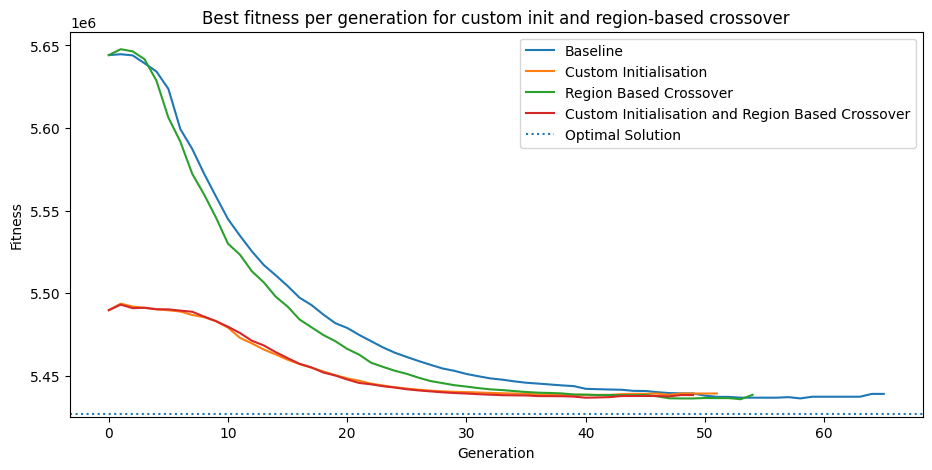

In [18]:
fig = plt.figure(figsize=(11, 5))

plot_best(all_fitnesses_avg, setup_names, f"custom init and region-based crossover", optimal_sol)

In [ ]:
# # pop size

# names = [x.split(" ")[-1] for x in setup_names]
# plot_best(all_fitnesses_avg, names, setup_idxs, optimal_sol, legend_title)

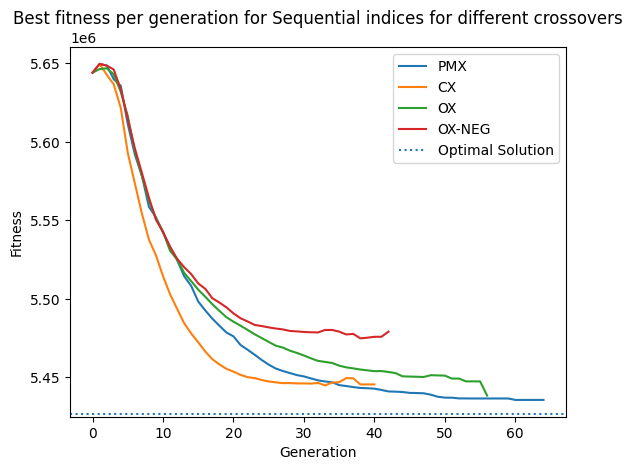

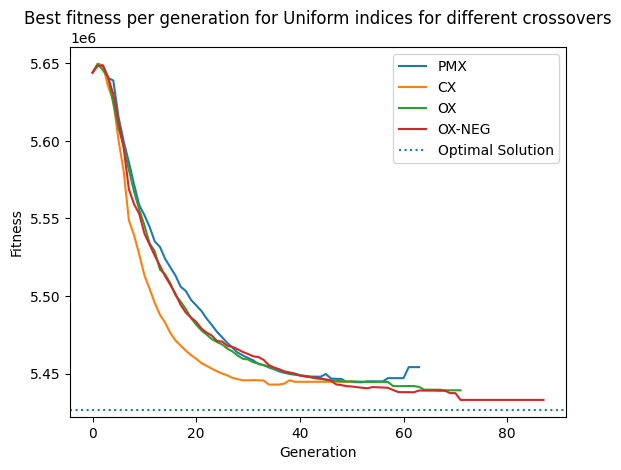

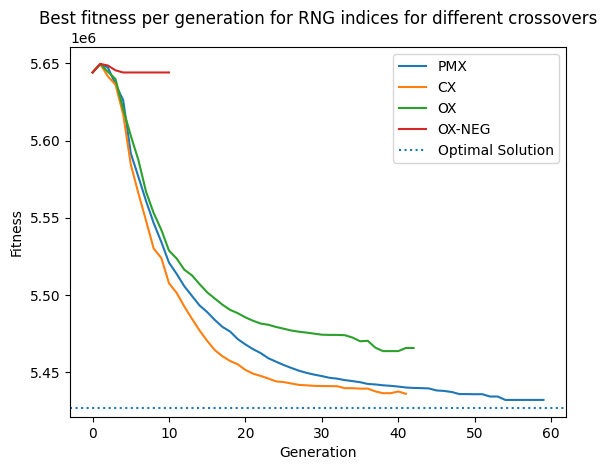

------------------------------------------------


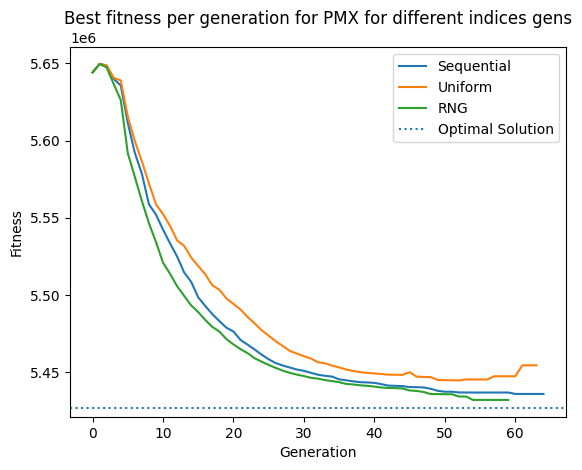

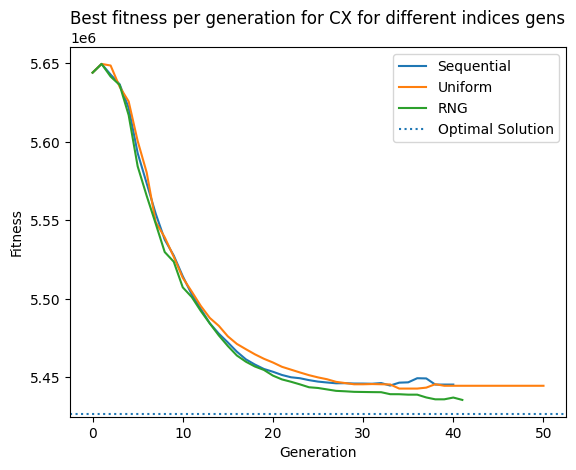

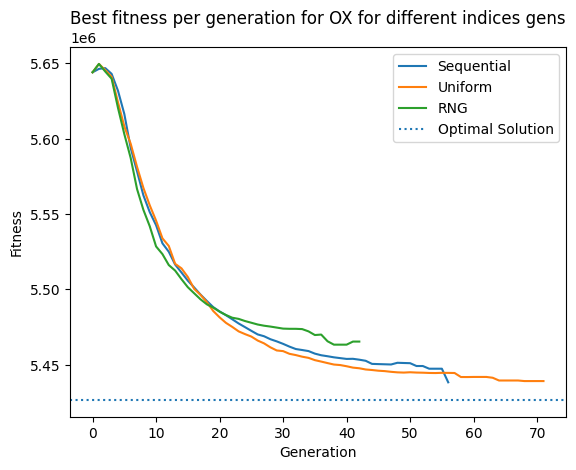

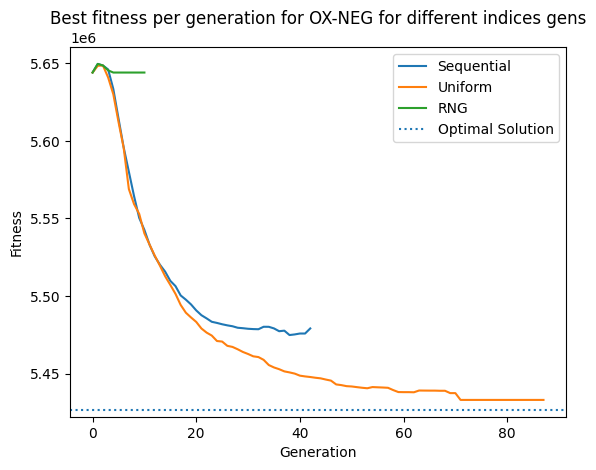

In [4]:
# crossover indices-gen

indices_gen_results = {}
crossover_results = {}


for data, setup_name in zip(all_fitnesses_avg, setup_names):
    crossover_fn, indices_gen = setup_name.split(" ")

    if indices_gen not in indices_gen_results:
        indices_gen_results[indices_gen] = ([], [])

    if crossover_fn not in crossover_results:
        crossover_results[crossover_fn] = ([], [])

    indices_gen_results[indices_gen][0].append(crossover_fn)
    indices_gen_results[indices_gen][1].append(data)

    crossover_results[crossover_fn] [0].append(indices_gen)
    crossover_results[crossover_fn] [1].append(data)



for indices_gen, (crossover_funcs, data) in indices_gen_results.items():
    plot_best(np.ma.array(data), crossover_funcs, f"{indices_gen} indices for different crossovers", optimal_sol)

print("------------------------------------------------")


for crossover_fn, (indices_gens, data) in crossover_results.items():
    plot_best(np.ma.array(data), indices_gens, f"{crossover_fn} for different indices gens", optimal_sol)

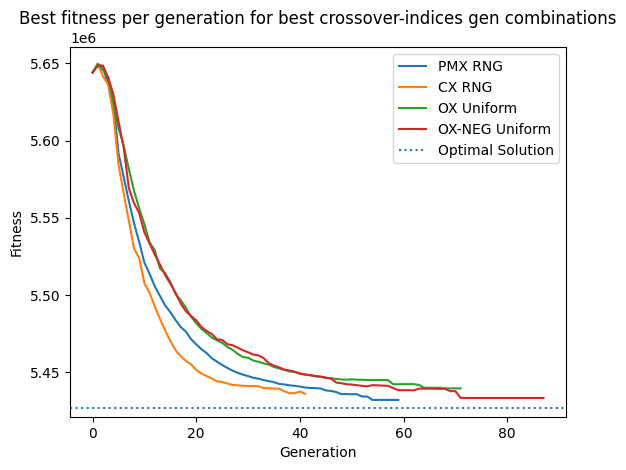

In [5]:
# best crossover indices-gen

best_per_crossover = ["PMX RNG", "CX RNG", "OX Uniform", "OX-NEG Uniform"]
data = extract_data(all_fitnesses_avg, setup_idxs, best_per_crossover)

plot_best(data, best_per_crossover, "best crossover-indices gen combinations", optimal_sol)